In [201]:
from scipy import ndimage
import skimage
from skimage import morphology as mph
from skimage import io
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from skimage.util import img_as_ubyte

In [ ]:
path_bin_image = 'images/i3.png'
image = img_as_ubyte(io.imread(path_bin_image, as_binary = True))


In [206]:
def hitmiss(img,struct1,struct2):
    eroded = mph.erosion(img,struct1)
    rev = 255 - img
    return eroded & mph.erosion(rev,struct2)

def thinning(img):
    temp = img
    for s1,s2 in structs:
        temp -= hitmiss(temp,s1,s2)
        
    return temp

def thickening(img):
    temp = img
    for s1,s2 in structs2:
        temp |= hitmiss(temp,s1,s2)
    return temp

###  Структурирующие элементы, использующиеся в алгоритме построения 45-выпуклой оболочки множества.


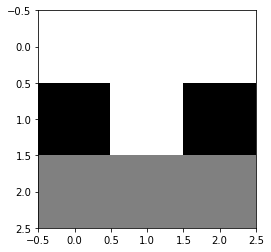

In [227]:
s1 = [
    [1,1,1],
    [0,1,0],
    [0,0,0]
]
s2 = [
    [0,0,0],
    [0,0,0],
    [1,1,1]
]
s1 = np.array(s1,dtype=np.uint8)
s2 = np.array(s2,dtype=np.uint8)
plt.imshow(s1 * 2 + s2,cmap = "gray")
plt.show()

structs = []
for i in range(4):
    structs.append((s1,s2))
    s1 = np.rot90(s1)
    s2 = np.rot90(s2)
    
s1 = [
    [0,1,0],
    [0,1,1],
    [0,0,0]
]
s2 = [
    [0,0,0],
    [1,0,0],
    [1,1,0]
]
s1 = np.array(s1,dtype=np.uint8)
s2 = np.array(s2,dtype=np.uint8)


for i in range(4):
    structs.append((s1,s2))
    s1 = np.rot90(s1)
    s2 = np.rot90(s2)
##############################################################
s1 = [
    [1,1,1],
    [0,0,1],
    [0,0,0]
]
s2 = [
    [0,0,0],
    [0,1,0],
    [0,0,0]
]
s1 = np.array(s1,dtype=np.uint8)
s2 = np.array(s2,dtype=np.uint8)

structs2 = []
for i in range(4):
    structs2.append((s1,s2))
    s1 = np.rot90(s1)
    s2 = np.rot90(s2)
    
s1 = [
    [1,1,1],
    [1,0,0],
    [0,0,0]
]
s2 = [
    [0,0,0],
    [0,1,0],
    [0,0,0]
]
s1 = np.array(s1,dtype=np.uint8)
s2 = np.array(s2,dtype=np.uint8)


for i in range(4):
    structs2.append((s1,s2))
    s1 = np.rot90(s1)
    s2 = np.rot90(s2)

In [178]:
def plot_struct_elements(elements):
    fig, (ax1, ax2 )= plt.subplots(nrows=2, ncols= 4, figsize=(10, 5))
    
    for index in range(4):
            ax1[index].imshow(elements[index][0], cmap=cm.binary)
            ax2[index].imshow(elements[index][1], cmap=cm.binary)
            


    fig.tight_layout()
    plt.show()

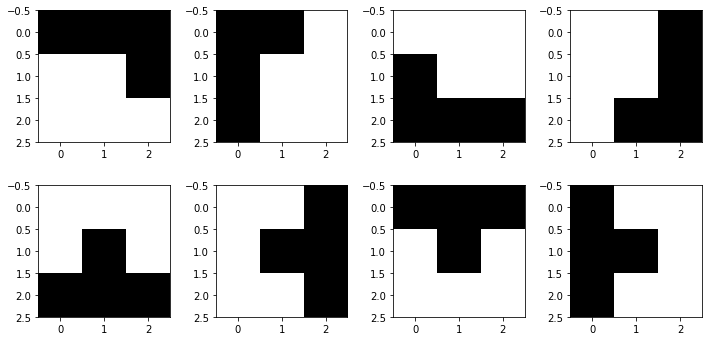

In [179]:
plot_struct_elements(structs)

###  Бинарное изображение а) и результат построения 45-выпуклой оболоч-ки б) на основе преобразований утолщения


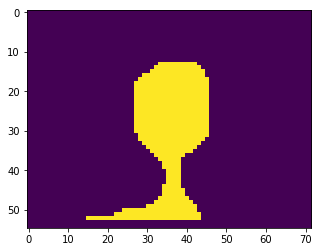

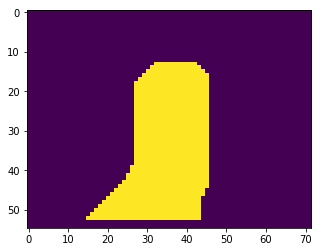

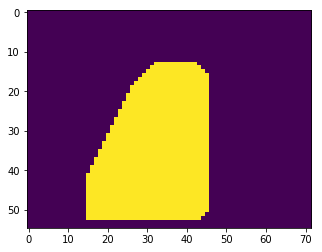

In [203]:
skel_im = np.array(image)
n = 0
temp = []
t = np.zeros(image.shape)
while np.count_nonzero(t - skel_im) > 0:
    t = np.array(skel_im)
    skel_im = thickening(skel_im)
    if n % 20 == 0:
        plt.imshow(skel_im)
        plt.show()
    temp.append(t)
    n+=1
    



## Утоньшение и алгоритмы скелетизации


In [222]:
path_bin_image = 'images/i3.png'
image = img_as_ubyte(io.imread(path_bin_image, as_binary = True))


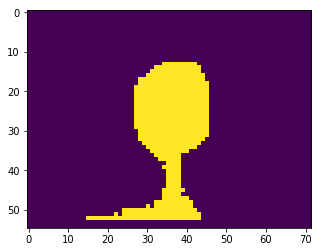

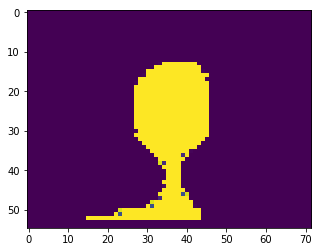

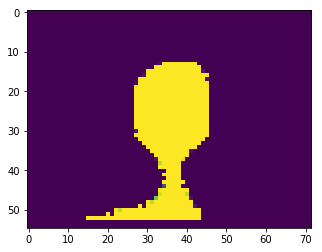

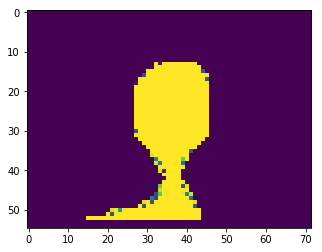

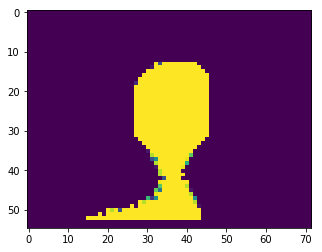

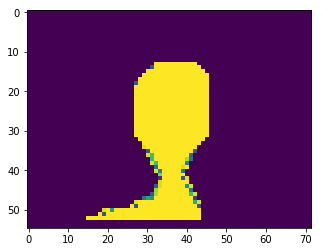

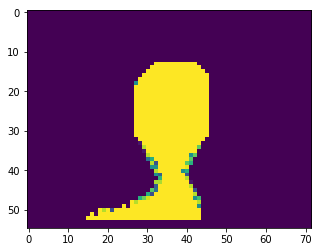

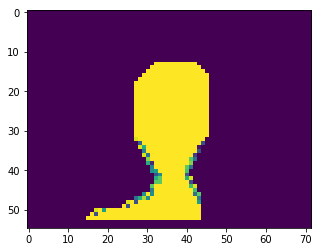

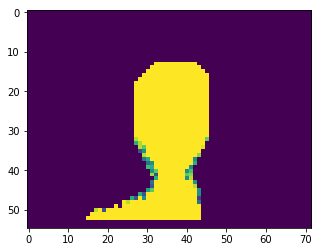

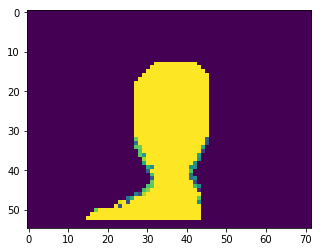

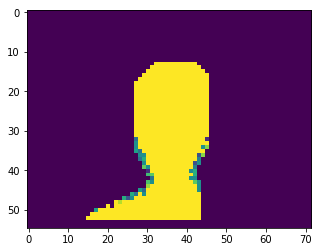

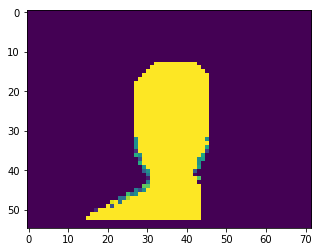

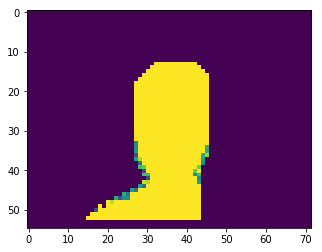

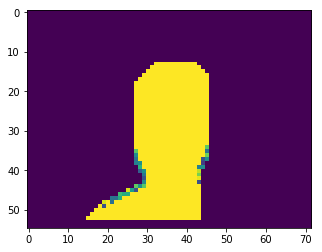

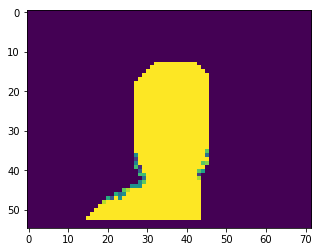

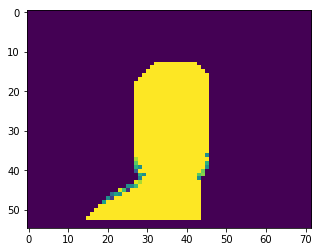

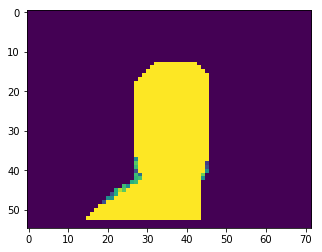

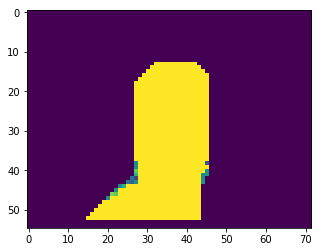

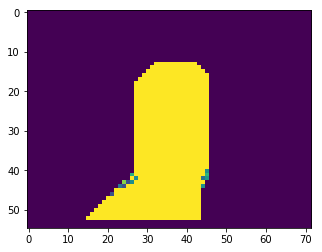

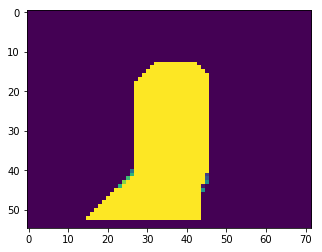

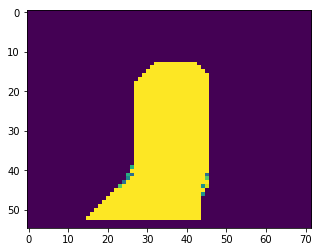

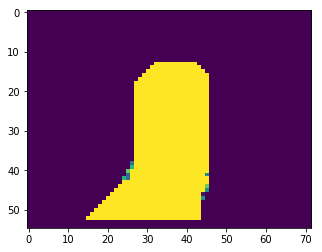

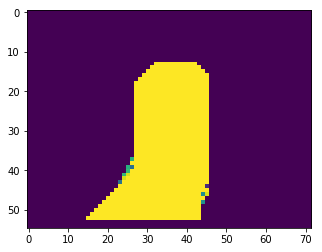

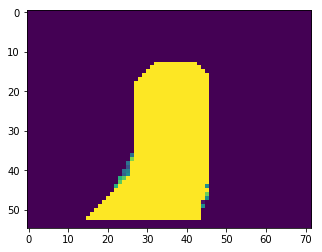

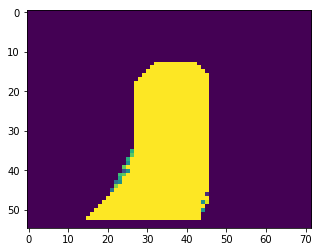

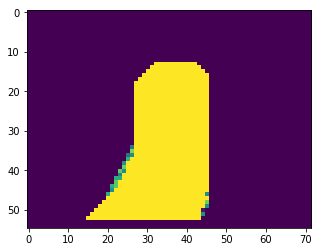

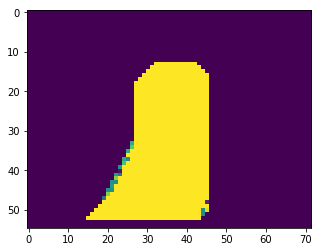

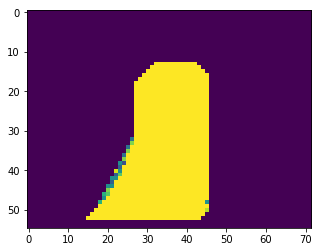

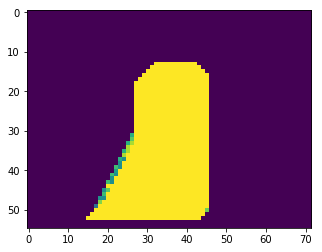

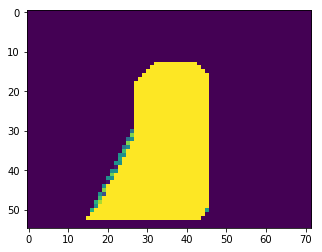

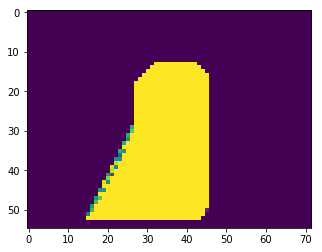

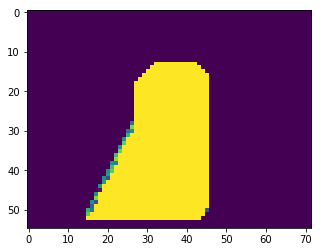

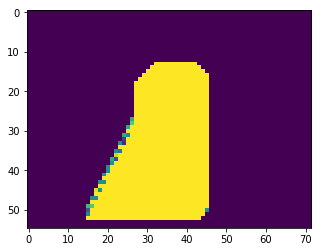

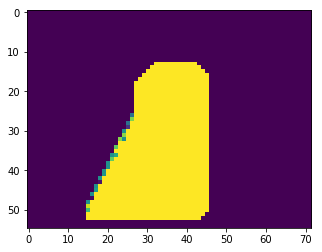

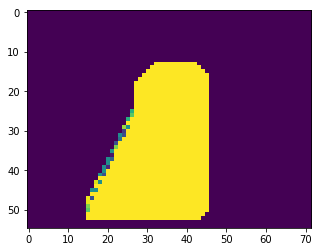

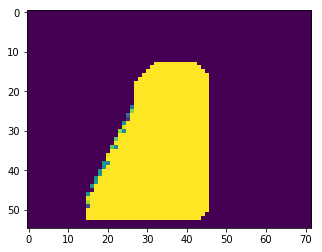

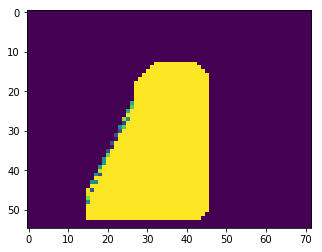

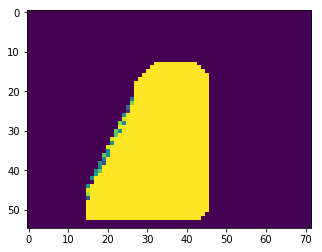

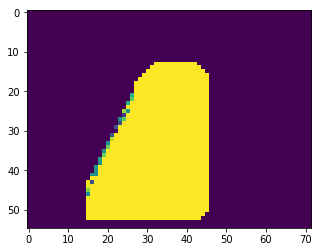

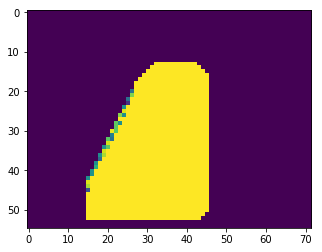

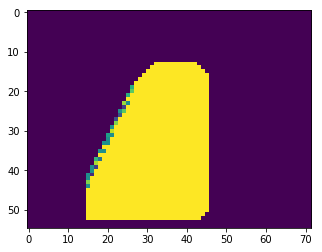

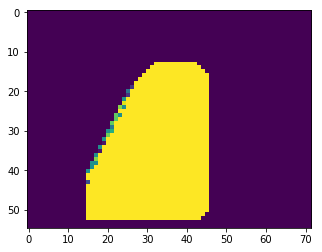

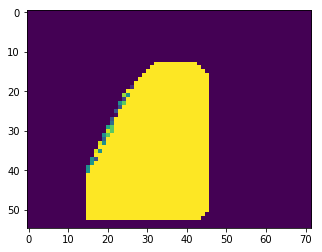

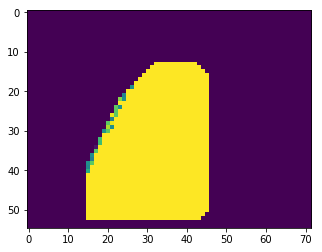

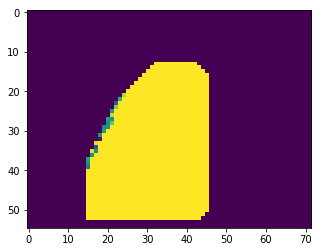

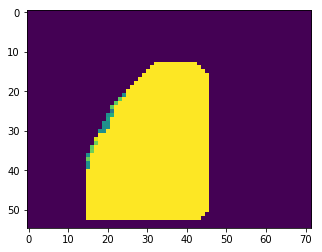

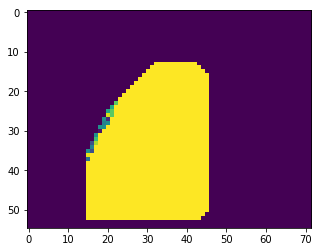

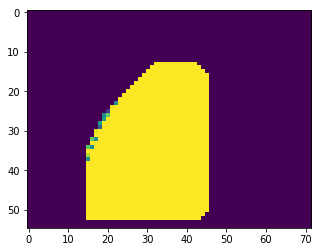

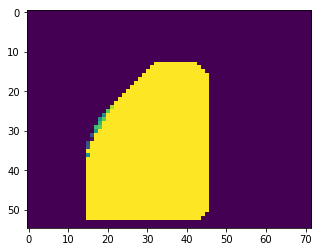

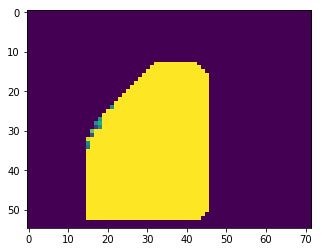

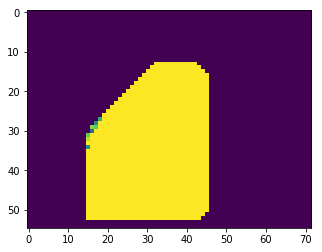

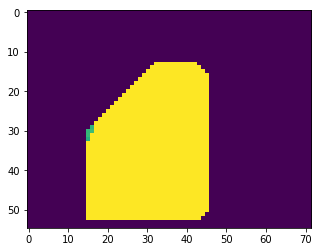

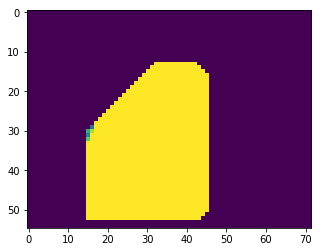

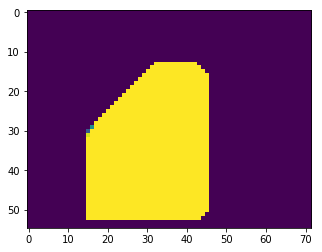

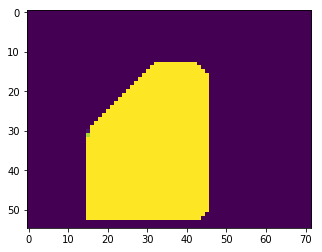

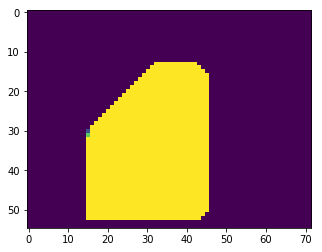

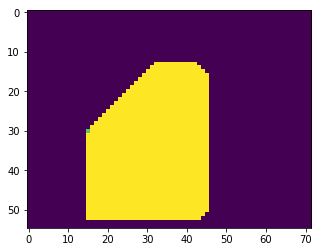

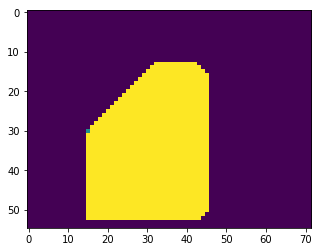

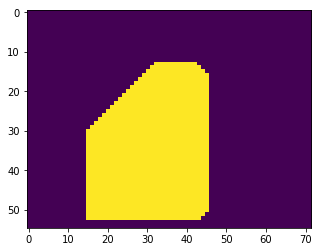

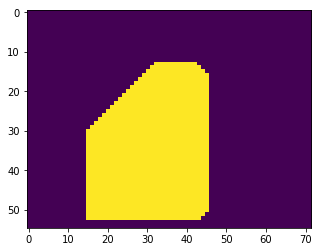

In [228]:
skel_im = np.array(image)
n = 0
temp = []
t = np.zeros(image.shape)
while np.count_nonzero(t - skel_im) > 0:
    t = np.array(skel_im)
    skel_im = thinning(skel_im)
    plt.imshow(skel_im)
    plt.show()
    temp.append(t)
    n+=1

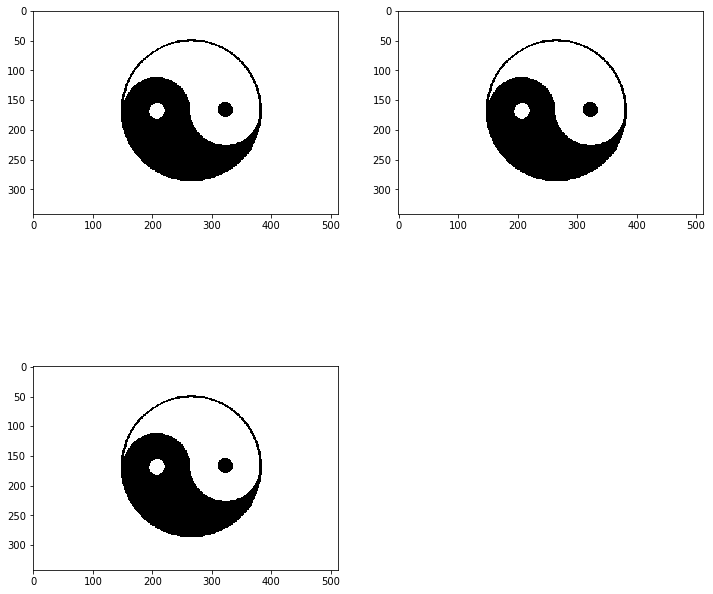

In [190]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(image, cmap=cm.binary)
plt.subplot(222)
plt.imshow(result, cmap=cm.binary)
plt.subplot(223)
plt.imshow(result, cmap=cm.binary)

plt.show()

In [224]:
def substract(a, b):
    c = np.empty((len(a), len(a[0])))
    for i in range(0, len(a)):
        for j in range(0, len(a[i])):
            if   b[i][j] >  a[i][j]:
                c[i][j] = int(a[i][j])
            else:
                c[i][j] = int(a[i][j] - b[i][j])
            
    return c

def invert(a):
    c = np.empty((len(a), len(a[0])))
    for i in range(0, len(a)):
        for j in range(0, len(a[i])):
            if a[i][j] == 0:
                c[i][j] = 255
            else:
                c[i][j] = 0            
    return c


def and_(a, b):
    for i in range(0, len(a)):
        for j in range(0, len(a[i])):
            if b[i][j] == a[i][j]:
                a[i][j] = a[i][j]
            else:
                a[i][j] = 0
    return a